# Exploratory Data Analysis on Speech Content

Last month, I got the chance to participate in Freecodecamp’s Data Analysis with Python: Zero to Pandas. This course provides real-life hands on experience for beginners in learning the basics of Python, Pandas, Numpy, Matplotlib, Seaborn and exploratory data analysis. Whilst I have some basic knowledge and skills in Python from some online courses I took from, I still find this 6-week course interesting and relevant since I still learn something new from each lecture and project given to us.

For the final course project, we are tasked to perform an exploratory data analysis on any real-world dataset of our choice. There are plenty of online sources where we can obtain data from like Kaggle,  UCI Machine Learning Repository and Google Dataset to name a few. 

Instead of utilizing data from these source, I opted to scrape data from the World Health Organization website. Specifically, the data I used in this project is the speech content of the Director General of WHO from March 1, 2020 to September 24, 2020. Essentially, this project aims to utilize this data, explore it and gain interesting insights from it.


In [1]:
project_name = "course-project-cortizftw" 

In [2]:
# !pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "cortiz/course-project-cortizftw" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/cortiz/course-project-cortizftw


'https://jovian.ml/cortiz/course-project-cortizftw'

### First things first. Load the necessary libraries

In [5]:
import pandas as pd  #data manipulation and analysis
import numpy as np   #arrays, linear algebra, matrices
import matplotlib.pyplot as plt   #plotting library
import seaborn as sns     #data visualization library

### Loading of data

In [6]:
df = pd.read_csv('Speech_content.csv')

In [7]:
df.columns = ['title', 'published_date', 'speech_content']

In [8]:
#Display all speech content in each row
pd.set_option('display.max_colwidth',None)

In [9]:
df.head()

title  \
0         WHO Director-General's opening remarks at the media briefing on COVID-19 - 25 September 2020   
1  WHO Director-General's opening remarks at the Member State briefing on COVID-19 - 24 September 2020   
2  Russian Federation and the WHO-led UN Inter-Agency Task Force on the Prevention and Control of NCDs   
3                                                    The 43rd Session of Codex Alimentarius Commission   
4           WHO Director-General's introductory remarks at the UNGA side event on infodemic management   

  published_date  \
0      25-Sep-20   
1      24-Sep-20   
2      24-Sep-20   
3      24-Sep-20   
4      23-Sep-20   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [10]:
df.shape

(156, 3)

The data is consists of 156 rows and 3 columns.

In [11]:
df.isna().sum()

title             0
published_date    0
speech_content    0
dtype: int64

There's no missing data on any column.

In [12]:
df.duplicated().sum()

0

There's no duplicate data either.

## Data Preparation and Cleaning

Choosing text data in this exploratory data analysis is quite challenging since it requires more data preparation and cleaning compared to numerical data.

Let's go through the data preparation process.

For the analysis, we're going to utilize the speech_content column.

#### a. Removal of Punctuation Marks and Numerics
For this step, I used the library re  (Regular Expressions) to remove punctuation marks and numerics.
Generally, Regex can be used to check if a string contains a specific pattern. To learn more about regex, you can visit the Regex documentation. https://docs.python.org/3/library/re.html

In [13]:
import re    # regular expressions library

#removal of punctuation marks

df['content_clean'] = df['speech_content'].replace(regex=True, to_replace = '[^\w\s]', value = ' ')

In [14]:
#removal of numerics

df['content_clean'] = df['content_clean'].replace(regex=True, to_replace = '\d+', value = '')

### b. Expressing all letters in lowercase
When dealing with strings in Python, you may want to convert the contents to lowercase. This is a common practice since strings are case sensitive.

In [15]:
df['content_clean'] = df['content_clean'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### c. Removal of Stopwords
Stopwords are the most frequently occuring words that might not add much value to the meaning of the document.
Natural Language Toolkit library has a list of stopwords in 16 languages and I utilized the english stopwords in the next pre-processing step.

In [16]:
import nltk    #library for natural language processing
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
stop_words = set(stopwords.words('english'))
# stop_words

In [18]:
df['content_clean'] = df['content_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [19]:
# df.head()

#### d. Tokenization
Tokenization is the process of splitting documents into single words called tokens. NLTK library provides methods on performing this action. Particularly, word_tokenize() splits sentences into single words. Also, tokenization is the pre-requisite in performing lemmatization and stemming.

In [20]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
# apply word_tokenize() to each row of speech_content
# df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(row['speech_content']), axis = 1).astype(str)

In [22]:
# df.head()

#### e. Lemmatization

Lemmatization is the process of reducing a word into its dictionary form. For instance, when we apply lemmatization to the words, 'supports', 'supported', 'unsupported, and 'supporting', all of these would turn to 'support'. This process considers context and parts of speech.

On the other hand, stemming refers to the process of reducing a word into its stem. However, it's good to note that a stem might not be always a word since this process removes unnecessary characters, usually suffixes. A good example would be applying stemming on the words, 'facilities', 'facility', 'facilitated', and the resulting stem would be 'facilit'. It's safe to say that stemming is not 100% effective. Thus, for this project, I applied lemmatization.

In [23]:
# importing WordNetLemmatizer from NLTK library

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,'v') for w in nltk.word_tokenize(text)]

In [25]:
df['lemmatized_content'] = df.content_clean.apply(lemmatize_text)

In [26]:
df.head()

title  \
0         WHO Director-General's opening remarks at the media briefing on COVID-19 - 25 September 2020   
1  WHO Director-General's opening remarks at the Member State briefing on COVID-19 - 24 September 2020   
2  Russian Federation and the WHO-led UN Inter-Agency Task Force on the Prevention and Control of NCDs   
3                                                    The 43rd Session of Codex Alimentarius Commission   
4           WHO Director-General's introductory remarks at the UNGA side event on infodemic management   

  published_date  \
0      25-Sep-20   
1      24-Sep-20   
2      24-Sep-20   
3      24-Sep-20   
4      23-Sep-20   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "cortiz/course-project-cortizftw" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/cortiz/course-project-cortizftw


'https://jovian.ml/cortiz/course-project-cortizftw'

## Exploratory Analysis and Visualization

After performing data pre-processing on the speech content data, I then proceed to extracting interesting insights from the speech content of the Director General of WHO.

Here, I used the libraries Matplotlib and sklearn to gain insights through different visualizations.

#### 1. What is the average number of words in each speech?

I created a column to determine the number of words in each speech content.

In [29]:
df['speech_len'] = df['speech_content'].str.split().str.len()

Text(0.5, 1.0, 'Word Count Distribution')

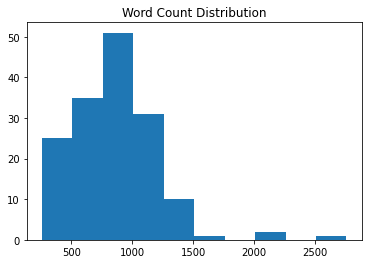

In [32]:
df.hist(column = 'speech_len', grid=False)
plt.title('Word Count Distribution')

We can deduced from the histogram that there are 4 outliers in terms of the number of words in each speech content.

In [33]:
df['speech_len'].describe()

count     156.000000
mean      860.089744
std       354.639233
min       260.000000
25%       631.750000
50%       849.500000
75%      1017.750000
max      2756.000000
Name: speech_len, dtype: float64

The average number of words on speeches is 860 words. Meanwhile, the minimum and maximum number of words are 260 and 2756 words respectively.

In [34]:
minimum = df[df['speech_len'] == 260]
# minimum

The speech with the minumum number of words happened last May-4-2020 on the pledging event hosted by the European Commission.

In [35]:
maximum = df[df['speech_len'] == 2756]
# maximum

The speech with the maximum number of words happened last May 18, 2020 on the opening remarks at the World Health Assembly.

#### 2. What are the Top 10 most frequently occuring words?

I used the sklearn library to import CountVectorizer that I used to determine the Top 10 most frequently occuring words.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['lemmatized_content'].astype(str), 10)

In [38]:
for word, freq in common_words:
    print(word, freq)

health 1474
countries 1181
covid 852
world 702
pandemic 630
case 560
people 552
work 548
global 450
thank 446


In [39]:
df_common = pd.DataFrame(common_words, columns = ['text' , 'count'])
df_common.head()

,text,count
0,health,1474
1,countries,1181
2,covid,852
3,world,702
4,pandemic,630


Text(0.5, 1.0, 'Top 10 Frequently Occuring Words')

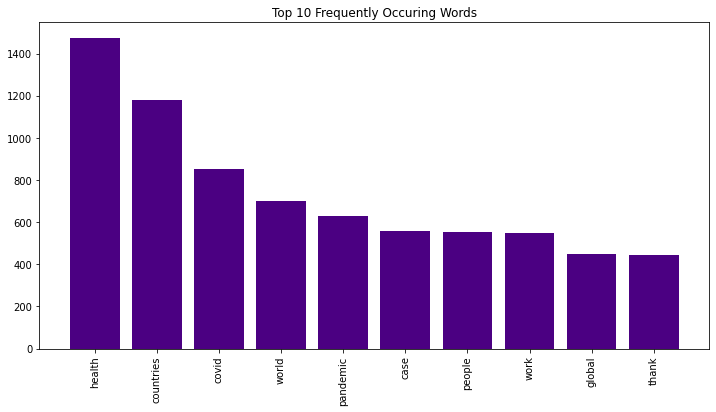

In [43]:
plt.figure(figsize=(12,6))
plt.bar(df_common['text'], df_common['count'], color='Indigo')
plt.xticks(rotation=90)
plt.title("Top 10 Frequently Occuring Words")

#### 3. What are the two words that frequently occur together?

Frequently occuring words are coined as n-grams. Such as, two words frequently occuring together are called bi-gram, three words frequently occuring together are called tri-grams and so on.

For the next analysis, let's find out the bi-grams and tri-grams from the collection of speeches of the Directort General of WHO.

In [44]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigram = get_top_n_bigram(df['lemmatized_content'].astype(str), 10)


In [45]:
for word, freq in common_bigram:
    print(word, freq)

health workers 217
health systems 157
public health 148
save live 133
member state 121
act accelerator 115
would like 114
many countries 110
around world 107
covid pandemic 106


Text(0.5, 1.0, 'Top 10 Two Words Frequently Occuring Together')

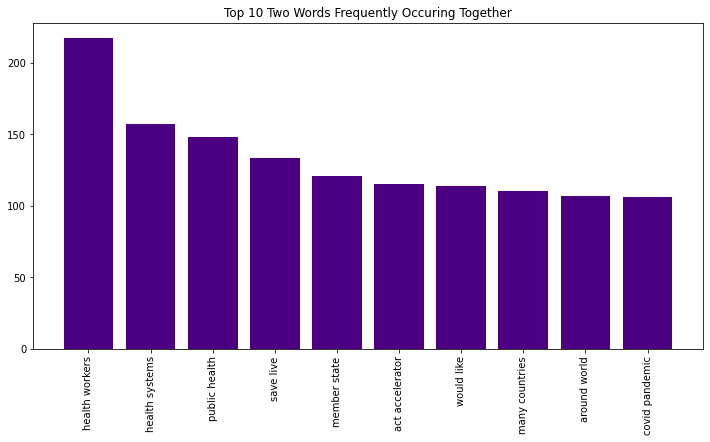

In [47]:
df_bigram = pd.DataFrame(common_bigram, columns = ['text' , 'count'])

plt.figure(figsize=(12, 6))
plt.bar(df_bigram['text'], df_bigram['count'], color='Indigo')
plt.xticks(rotation=90)
plt.title("Top 10 Two Words Frequently Occuring Together")

#### 4. What are the three words frequently occuring together?

In [49]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_trigram = get_top_n_trigram(df['lemmatized_content'].astype(str), 10)

In [50]:
for word, freq in common_trigram:
    print(word, freq)

good afternoon good 80
morning good afternoon 79
afternoon good even 79
good morning good 78
dear colleagues friends 70
universal health coverage 58
essential health service 53
personal protective equipment 52
excellencies dear colleagues 49
vaccines diagnostics therapeutics 40


Text(0.5, 1.0, 'Top 10 Three Words Frequently Occuring Together')

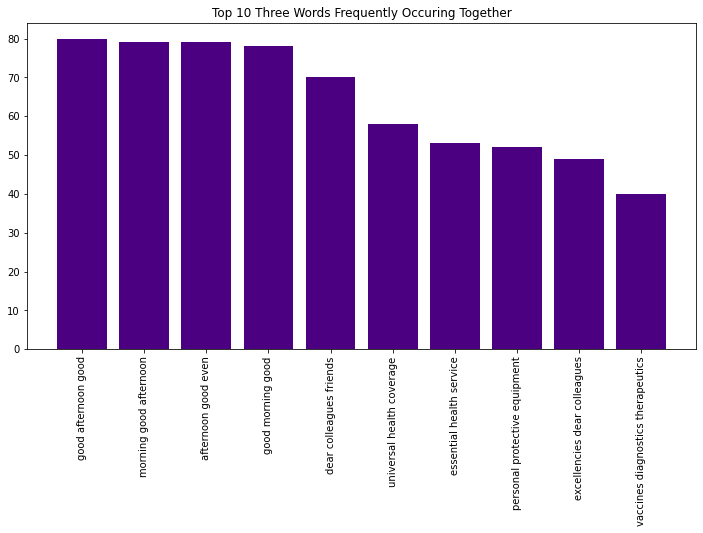

In [51]:
df_trigram = pd.DataFrame(common_trigram, columns = ['text' , 'count'])

plt.figure(figsize=(12,6))
plt.bar(df_trigram['text'], df_trigram['count'], color='Indigo')
plt.xticks(rotation=90)
plt.title("Top 10 Three Words Frequently Occuring Together")

#### 5. Where does the Director General focused more?

"Word clouds is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is."

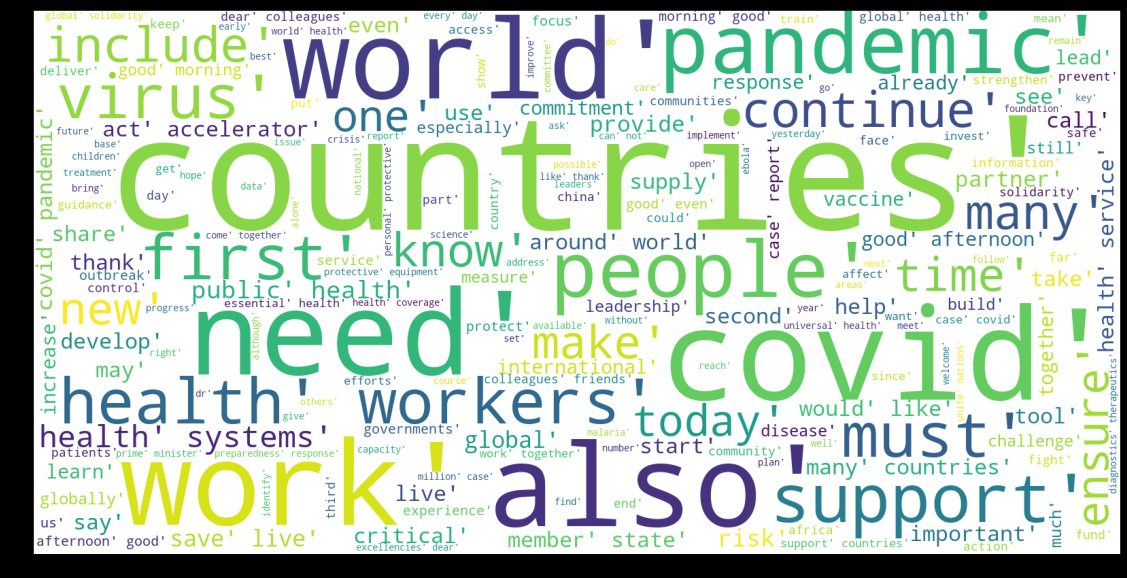

In [53]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['lemmatized_content'].astype(str)))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "cortiz/course-project-cortizftw" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/cortiz/course-project-cortizftw


'https://jovian.ml/cortiz/course-project-cortizftw'

## Inferences and Conclusion

Upon performing exploratory data analysis, I found that the average number of words in the collection of speeches is 860 words. On the average, it would take approximately 7 minutes to deliver his speech and this is according to http://www.speechinminutes.com/

Overall, we have noticed that the Director General gave emphasis and importance on these keywords during his speech:
health workers, health systems, public health, support from each country and addressing the needs of the people.

In [58]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "cortiz/course-project-cortizftw" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


## References and Future Work

In [ ]:
import jovian

In [ ]:
jovian.commit()